## Faster R-CNN object detection

In [3]:
import os.path

import cv2
import numpy as np
import requests
import torchvision
import torchvision.transforms as transforms

from pathlib import PosixPath

In [6]:
class_names = PosixPath("../data/coco.names")
assert class_names.is_file()

In [7]:
class_names = class_names.read_text().split("\n")

##  load the pytorch model

In [8]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/ZRC/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [9]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [38]:
image_name = "IMG_0937.png"
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
img = cv2.imread(image_name)
nn_input = transform(img)
output = model([nn_input])

In [39]:
# random color for each class
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

# iterate over the network output for all boxes
for box, box_class, score in zip(output[0]['boxes'].detach().numpy(),
                                 output[0]['labels'].detach().numpy(),
                                 output[0]['scores'].detach().numpy()):

    # filter the boxes by score
    if score > 0.95:
        # transform bounding box format
        box = [(box[0], box[1]), (box[2], box[3])]

        # select class color
        color = colors[box_class]

        # extract class name
        class_name = class_names[box_class]

        # draw the bounding box
        cv2.rectangle(img,
                      pt1=box[0],
                      pt2=box[1],
                      color=color,
                      thickness=2)

        # display the box class label
        cv2.putText(img=img,
                    text=class_name,
                    org=box[0],
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1,
                    color=color,
                    thickness=2)

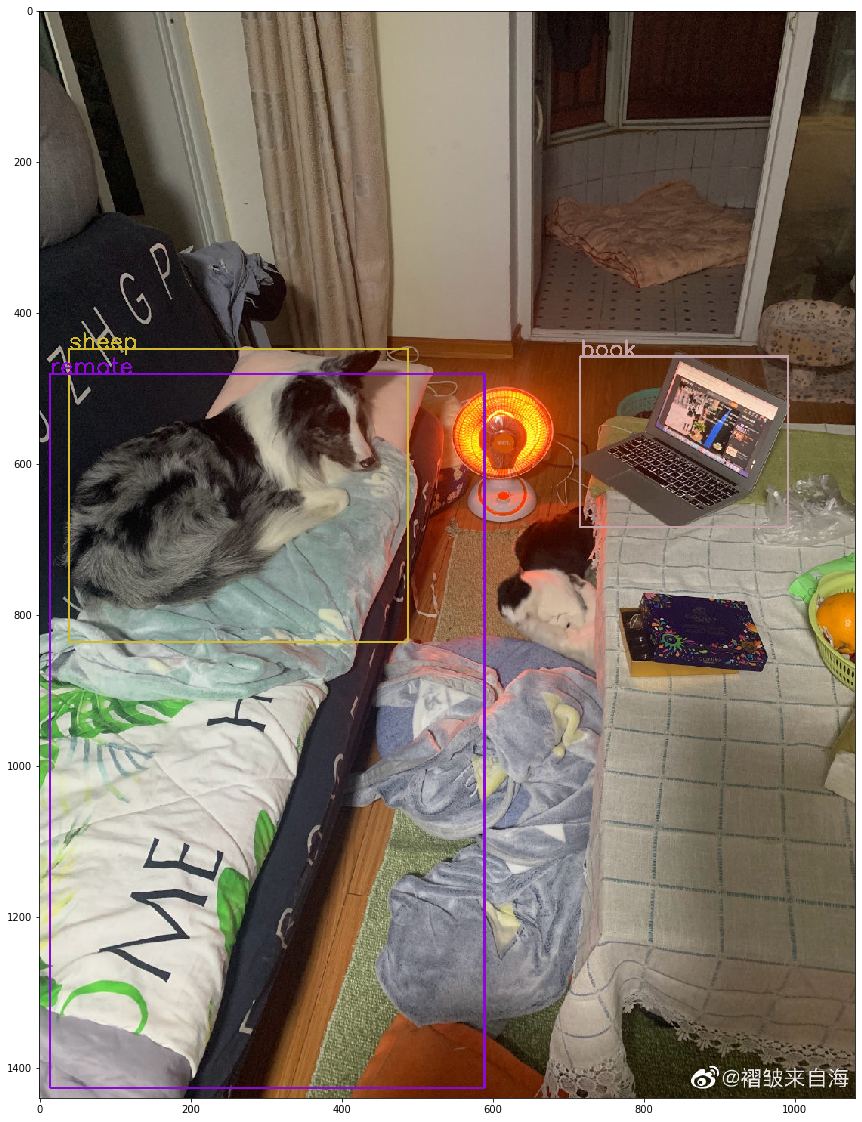

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))